In [325]:
import random as rand
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [326]:
data = pd.read_csv('LogisticRegression.csv')
data = data.dropna()

In [327]:
X = data[['MinTemp', 'MaxTemp', 'Rainfall','Evaporation','Sunshine','RainToday']]
X["RainToday"].dtype
X["RainToday"]=(X["RainToday"].replace("Yes",1)).replace("No",0)
# X=X.fillna(X.mean())

In [328]:
Y= data[['RainTomorrow']]
Y["RainTomorrow"].dtype
Y["RainTomorrow"]=(Y["RainTomorrow"].replace("Yes",1)).replace("No",0)

In [329]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def cost_function(y, y_pred):
    m = len(y)
    cost = (-1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

In [330]:
def logistic_regression(X, Y, learning_rate, iterations):
    m, n = X.shape
    coefficients = np.zeros((n,1))
    cost_history = []

    for iteration in range(iterations):
        z = X @ coefficients
        predictions = sigmoid(z)
        
        gradient = (1 / m) * (X.T @ (predictions - Y))
        coefficients -= learning_rate * gradient
        
        cost = cost_function(Y, predictions)
        cost_history.append(cost)

        if iteration % 1000 == 0:
            print(f"Epoch {iteration}: Cost = {cost}")

    return coefficients, cost_history


In [331]:
print(X.shape, Y.shape)

(56420, 6) (56420, 1)


In [332]:
X = (X - X.mean()) / X.std() #standardizing
X.insert(0, "intercept", np.ones(len(X))) #biases

X = X.values
Y = Y.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [333]:
print(X.shape, Y.shape)

(56420, 7) (56420, 1)


In [334]:
print(X_train.shape, Y_train.shape)

(45136, 7) (45136, 1)


In [335]:
print(X_test.shape, Y_test.shape)

(11284, 7) (11284, 1)


In [336]:
def predict(X, coefficients, threshold=0.5):
    return sigmoid(X @ coefficients) >= threshold


def accuracy(y_true, y_pred):
    return (np.mean(y_true == y_pred))*100

Epoch 0: Cost = 0.6931471805599453
Epoch 1000: Cost = 0.5707077324754761
Epoch 2000: Cost = 0.5102841625086119
Epoch 3000: Cost = 0.4761221213898668
Epoch 4000: Cost = 0.4550044170157049
Epoch 5000: Cost = 0.4411239444846499
Epoch 6000: Cost = 0.4315828623549777
Epoch 7000: Cost = 0.42479689997404046
Epoch 8000: Cost = 0.41983899158430193
Epoch 9000: Cost = 0.4161373150408939
Accuracy:  81.74406238922369


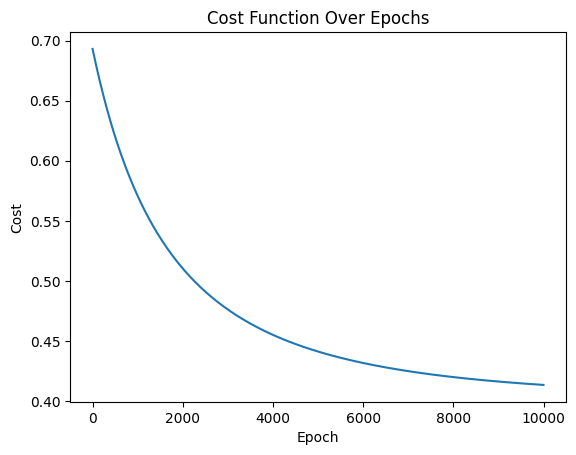

In [337]:
def PLOT(X,Y):

    learning_rate = 0.0012
    iterations = 10000

    coefficients, cost_history = logistic_regression(X_train,Y_train, learning_rate, iterations)

    predictions = predict(X_test, coefficients)

    print("Accuracy: ", accuracy(Y_test, predictions))
    plt.plot(range(iterations), cost_history)
    plt.title("Cost Function Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.show()


PLOT(X,Y)